In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import glob
import time
import tensorflow as tf
from pathlib import Path
import sklearn
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/competition_3.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/K/K513.jpg        
  inflating: train/K/K1606.jpg       
  inflating: train/K/K1243.jpg       
  inflating: train/K/K463.jpg        
  inflating: train/K/K406.jpg        
  inflating: train/K/K962.jpg        
  inflating: train/K/K1458.jpg       
  inflating: train/K/K2318.jpg       
  inflating: train/K/K338.jpg        
  inflating: train/K/K161.jpg        
  inflating: train/K/K2949.jpg       
  inflating: train/K/K1120.jpg       
  inflating: train/K/K131.jpg        
  inflating: train/K/K1053.jpg       
  inflating: train/K/K1938.jpg       
  inflating: train/K/K2055.jpg       
  inflating: train/K/K1898.jpg       
  inflating: train/K/K1834.jpg       
  inflating: train/K/K149.jpg        
  inflating: train/K/K1998.jpg       
  inflating: train/K/K877.jpg        
  inflating: train/K/K1205.jpg       
  inflating: train/K/K580.jpg        
  inflating: train/K/K1219.jpg       
  inflating: train/K/K2877.jpg       

In [5]:
train_dir = '/content/train'
test_dir = '/content/test'

In [6]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input)

In [7]:
target_size=(256,256)
batch_size=64

In [8]:
train_set = train_datagen.flow_from_directory(train_dir, subset='training', class_mode='categorical', batch_size=batch_size, shuffle=True, target_size=target_size)
valid_set = train_datagen.flow_from_directory(train_dir, subset='validation', class_mode='categorical', batch_size=batch_size, shuffle=True, target_size=target_size)

Found 23203 images belonging to 29 classes.
Found 5800 images belonging to 29 classes.


In [9]:
base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=(256,256,3))

94683136/94668760 [==============================] - 2s 0us/step


In [10]:
model = tf.keras.Sequential([
    base_model, tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(29, activation='softmax')
])
lr=0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
patience = 1
stop_patience = 2
factor = 0.5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [12]:
epochs = 4
history = model.fit(train_set, validation_data=valid_set, epochs=epochs, callbacks=callbacks, verbose=1)

Epoch 1/4
363/363 [==============================] - 645s 2s/step - loss: 0.1788 - accuracy: 0.9466 - val_loss: 0.3387 - val_accuracy: 0.9181
Epoch 2/4
363/363 [==============================] - 598s 2s/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.4856 - val_accuracy: 0.8931

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 3/4
363/363 [==============================] - 598s 2s/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1365 - val_accuracy: 0.9659
Epoch 4/4
363/363 [==============================] - 598s 2s/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.1532 - val_accuracy: 0.9607

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.


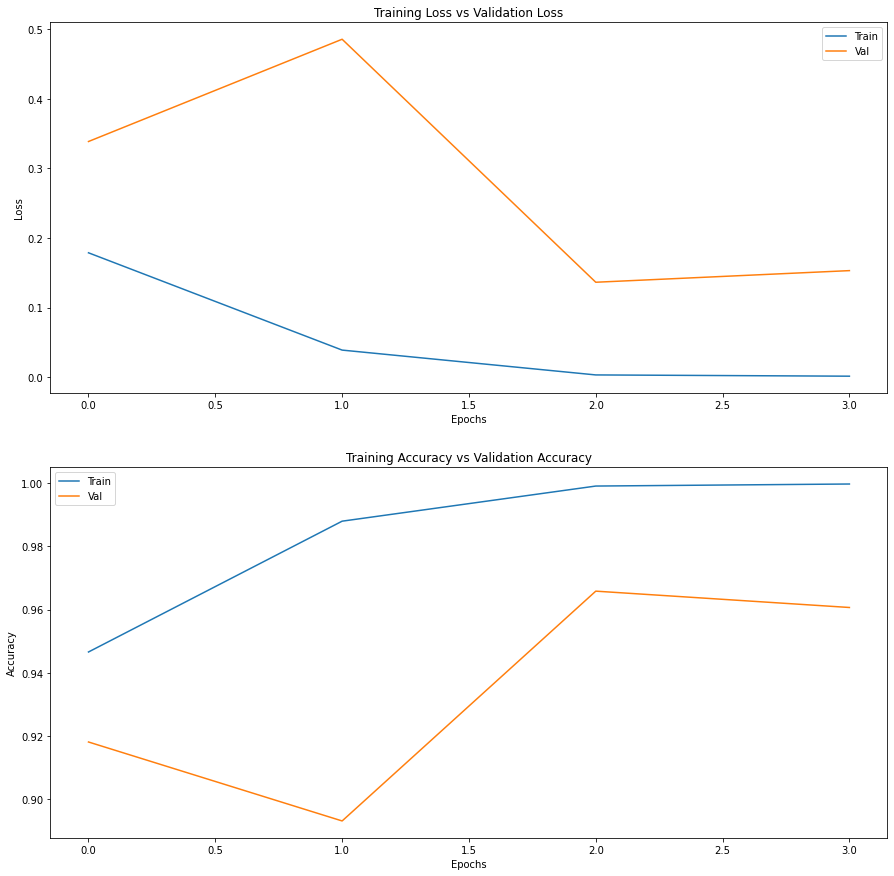

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [14]:
!unzip /content/drive/MyDrive/tt.zip

Archive:  /content/drive/MyDrive/tt.zip
   creating: tt/
   creating: tt/test/
  inflating: tt/test/00119f23.jpg    
  inflating: tt/test/0064b90d.jpg    
  inflating: tt/test/007f62c2.jpg    
  inflating: tt/test/00978862.jpg    
  inflating: tt/test/00c85c96.jpg    
  inflating: tt/test/00d12141.jpg    
  inflating: tt/test/00d25a6c.jpg    
  inflating: tt/test/00d970f9.jpg    
  inflating: tt/test/00edc447.jpg    
  inflating: tt/test/010ddc80.jpg    
  inflating: tt/test/0143ea07.jpg    
  inflating: tt/test/014533bc.jpg    
  inflating: tt/test/015b8f23.jpg    
  inflating: tt/test/0162be45.jpg    
  inflating: tt/test/0168d3e6.jpg    
  inflating: tt/test/01943fc2.jpg    
  inflating: tt/test/01d684af.jpg    
  inflating: tt/test/01f5357d.jpg    
  inflating: tt/test/01f91d10.jpg    
  inflating: tt/test/01f9f82c.jpg    
  inflating: tt/test/0200d25f.jpg    
  inflating: tt/test/0201ff0f.jpg    
  inflating: tt/test/021740e4.jpg    
  inflating: tt/test/0260af21.jpg    
  inflati

In [15]:
test = ImageDataGenerator(rescale=1./255).flow_from_directory("/content/tt", target_size=(256, 256), class_mode="categorical")


Found 2900 images belonging to 1 classes.


In [16]:
import string
add_valuse = {
  26: "del",
  27: "nothing",
  28: "space",
  
}
dic={}
str=string.ascii_uppercase
for i in range(len(str)):
  dic[i]=str[i]

dic.update(add_valuse)


In [17]:
lst=[]
pred = model.predict(test)
for i in pred:
   for k , v in dic.items():
       if np.argmax(i)==k:
          lst.append(v)
          continue
   

In [18]:
names = os.listdir('/content/tt/test')

In [19]:
data = {'id':names, 'pred': lst}  

In [21]:
df = pd.DataFrame(data) 
df.to_csv('task.csv')